---

# The Perceptron Algorithm

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jghamdi/INDE577_Repo/blob/main/Perceptron%20Algorithm/Perceptron_Algo.ipynb)

### Introduction
In this notebook, we delve into the fascinating realm of machine learning by implementing the Perceptron algorithm, a foundational concept in the history of artificial intelligence. The Perceptron represents a crucial milestone in the evolution of neural network models.

### Brief History
##### Rise of the Perceptron Algorithm

The roots of the Perceptron algorithm trace back to the groundbreaking work of Warren McCullock and Walter Pitts in 1943. Their conceptualization of the McCullock-Pitts (MCP) neuron, a simplified brain cell functioning as a logic gate with binary outputs, laid the foundation for artificial neurons. Multiple signals arriving at dendrites were integrated into the cell body, and if the accumulated signal exceeded a threshold, an output signal was generated through the axon. This early model set the stage for the development of artificial neurons and, ultimately, the Perceptron.

##### Understanding Artificial Neurons: Bridging the Biological and Computational Realms

Artificial neurons, inspired by their biological counterparts, are mathematical functions within neural networks. These neurons process inputs by assigning weights, summing them, and passing the sum through a nonlinear function to produce an output. In comparison to biological neurons, artificial neurons mimic the role of cell nucleus, dendrites, synapse, and axon through their node, input, weights, and output components, respectively. The integration of artificial neurons in neural networks forms the backbone of modern machine learning.

##### Perceptron Unveiled: The Birth of Binary Classification

Introduced by Frank Rosenblatt in 1957, the Perceptron marked a significant leap in artificial intelligence. Building upon the MCP neuron, Rosenblatt proposed a Perceptron learning rule, facilitating supervised learning of binary classifiers. The Perceptron processes elements in the training set one at a time, enabling neurons to learn and adapt. Its simplicity, yet effectiveness, has made the Perceptron a cornerstone in the realm of machine learning, particularly for binary classification tasks.

### Application
 This single-neuron algorithm serves as the bedrock for binary classification tasks, and in this exploration, we apply it to the Palmer Penguins dataset.







---

In [3]:
# Import standard data science libraries for visualization and data manipulation.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a helpful function for plotting decision boundaries.
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme for aesthetic visualizations.
sns.set_theme()

# Load the Palmer Penguin dataset from the provided CSV file.
df = pd.read_csv('palmer_penguins.csv')



---
#### Explore the Data

Before diving into analysis, let's take a moment to familiarize ourselves with the dataset. 
Understanding the column headings will provide insights into the species and their characteristics.

---

In [4]:
# Print the column headings to gain insight into the available data.
print(df.keys())

# Explore unique values in categorical columns to identify different species.
df['species'].unique()


Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)


---

This scatter plot visually represents the relationship between bill length and bill depth, color-coded by species. 
The primary goal is to assess the linear separability of species, a crucial factor for the effectiveness of the perceptron algorithm. 
By visualizing the data in this way, we aim to gain insights into how distinct the species are based on these features, addressing previous challenges in species selection for the algorithm.

----


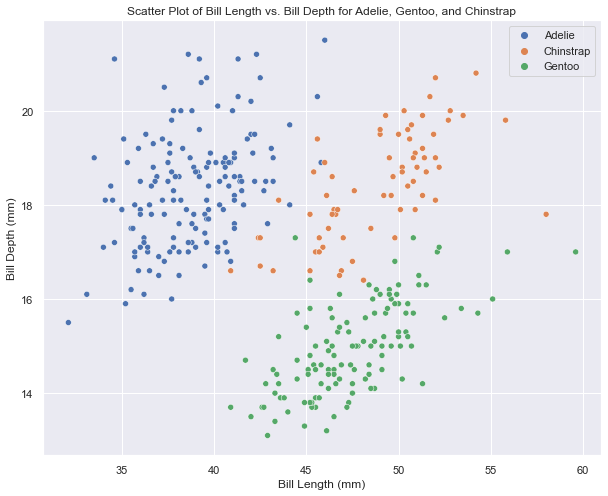

In [5]:
# Create a figure with a size of 10x8 inches for a clear visualization.
plt.figure(figsize=(10, 8))

# Generate a scatter plot depicting the relationship between bill length and bill depth, color-coded by species.
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)

# Set a title for the plot describing the variables being visualized.
plt.title('Scatter Plot of Bill Length vs. Bill Depth for Adelie, Gentoo, and Chinstrap')

# Label the x and y axes for clarity.
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Display a legend to identify the different penguin species.
plt.legend()

# Show the plot.
plt.show()

In [6]:
# Extract a subset of the dataset, specifically the columns 'bill_length_mm', 'bill_depth_mm', and 'species'.
# This subset, assigned to 'target_data', focuses on the features relevant for analysis.
target_data = df[['bill_length_mm', 'bill_depth_mm', 'species']]

# Display the resulting subset.
target_data



,bill_length_mm,bill_depth_mm,species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,NaN,NaN,Adelie
4,36.7,19.3,Adelie
...,...,...,...
339,NaN,NaN,Gentoo
340,46.8,14.3,Gentoo
341,50.4,15.7,Gentoo
342,45.2,14.8,Gentoo


---

To streamline our analysis, we have chosen to focus on the 'Adelie' and 'Gentoo' penguin species. This decision is based on the observation of the scatter plot above, where it becomes evident that these two species exhibit a degree of linear separability in the context of the provided features. By narrowing our focus to 'Adelie' and 'Gentoo,' we aim to enhance the effectiveness of the perceptron algorithm, leveraging the distinct characteristics observed in the plot.

---


In [7]:
# Filter the 'target_data' dataframe to include only rows where the species is 'Adelie' or 'Gentoo'.
# This step is taken to focus our analysis on these particular penguin species.
target_data = target_data[target_data['species'].isin(['Adelie', 'Gentoo'])]

# Display the resulting subset of the data containing only 'Adelie' and 'Gentoo' species.
print(target_data)


     bill_length_mm  bill_depth_mm species
0              39.1           18.7  Adelie
1              39.5           17.4  Adelie
2              40.3           18.0  Adelie
3               NaN            NaN  Adelie
4              36.7           19.3  Adelie
..              ...            ...     ...
339             NaN            NaN  Gentoo
340            46.8           14.3  Gentoo
341            50.4           15.7  Gentoo
342            45.2           14.8  Gentoo
343            49.9           16.1  Gentoo

[276 rows x 3 columns]


---

#### Data Preprocessing for Perceptron Algorithm

In preparing our data for the perceptron algorithm, we simplify our analysis by concentrating on two essential feature measurements: "bill length" and "bill depth." This deliberate focus aims to enhance clarity and efficiency in our model training.

Additionally, we convert the categorical species names into numerical values to facilitate the perceptron algorithm's understanding. Specifically, we map the "Adelie" species to -1 and the "Gentoo" species to 1. The following code snippet demonstrates the preprocessing steps, ensuring our data is appropriately formatted for the perceptron algorithm.

---


In [8]:
# Extract features 'bill_length_mm' and 'bill_depth_mm' from the 'target_data' DataFrame and convert to NumPy array.
X = target_data[['bill_length_mm', 'bill_depth_mm']].values  

# Extract the 'species' column as the target variable 'y' from the 'target_data' DataFrame.
y = target_data['species'].values

# Find indices where NaN values are present in the feature array 'X'.
nan_indices = np.isnan(X).any(axis=1)

# Remove rows containing NaN values from both the feature array 'X' and the target variable 'y'.
X = X[~nan_indices]
y = y[~nan_indices]

# Filter rows in 'target_data' based on the specified target species 'Adelie' and 'Gentoo'.
target_species = ['Adelie', 'Gentoo']
target_data = target_data[target_data['species'].isin(target_species)]

# Convert the target variable 'y' to numeric values, mapping 'Adelie' to -1 and others to 1.
y = np.where(y == 'Adelie', -1, 1)

# Print the resulting feature array 'X' and target variable 'y'.
print(X)
print(y)




[[39.1 18.7]
 [39.5 17.4]
 [40.3 18. ]
 [36.7 19.3]
 [39.3 20.6]
 [38.9 17.8]
 [39.2 19.6]
 [34.1 18.1]
 [42.  20.2]
 [37.8 17.1]
 [37.8 17.3]
 [41.1 17.6]
 [38.6 21.2]
 [34.6 21.1]
 [36.6 17.8]
 [38.7 19. ]
 [42.5 20.7]
 [34.4 18.4]
 [46.  21.5]
 [37.8 18.3]
 [37.7 18.7]
 [35.9 19.2]
 [38.2 18.1]
 [38.8 17.2]
 [35.3 18.9]
 [40.6 18.6]
 [40.5 17.9]
 [37.9 18.6]
 [40.5 18.9]
 [39.5 16.7]
 [37.2 18.1]
 [39.5 17.8]
 [40.9 18.9]
 [36.4 17. ]
 [39.2 21.1]
 [38.8 20. ]
 [42.2 18.5]
 [37.6 19.3]
 [39.8 19.1]
 [36.5 18. ]
 [40.8 18.4]
 [36.  18.5]
 [44.1 19.7]
 [37.  16.9]
 [39.6 18.8]
 [41.1 19. ]
 [37.5 18.9]
 [36.  17.9]
 [42.3 21.2]
 [39.6 17.7]
 [40.1 18.9]
 [35.  17.9]
 [42.  19.5]
 [34.5 18.1]
 [41.4 18.6]
 [39.  17.5]
 [40.6 18.8]
 [36.5 16.6]
 [37.6 19.1]
 [35.7 16.9]
 [41.3 21.1]
 [37.6 17. ]
 [41.1 18.2]
 [36.4 17.1]
 [41.6 18. ]
 [35.5 16.2]
 [41.1 19.1]
 [35.9 16.6]
 [41.8 19.4]
 [33.5 19. ]
 [39.7 18.4]
 [39.6 17.2]
 [45.8 18.9]
 [35.5 17.5]
 [42.8 18.5]
 [40.9 16.8]
 [37.2 19.4]

---

Now, we will construct a custom Python class that encapsulates essential elements such as the scaling value for the cost function, the number of training epochs, the weights (including bias), and the training errors on a specific instance. Furthermore, this Python class will feature methods for training, input processing, and prediction.

---

In [9]:
# Perceptron Model Class

class Perceptron(object):
    def __init__(self, eta=0.5, epochs=50):
        """
        Initialize a Perceptron object.

        Parameters:
        - eta: Learning rate (default is 0.5)
        - epochs: Number of training epochs (default is 50)
        """
        self.eta = eta
        self.epochs = epochs
        # Initialize weights randomly in the constructor.
        self.w_ = np.random.rand(1 + X.shape[1])
        # List to store the number of misclassifications in each epoch.
        self.errors_ = []

    def train(self, X, y):
        """
        Train the perceptron with the given training data.

        Parameters:
        - X: Input data
        - y: Target values

        Returns:
        - Trained Perceptron object
        """
        for _ in range(self.epochs):
            errors = 0
            # Iterate through each data point and its target.
            for xi, target in zip(X, y):
                # Update weights based on the prediction error.
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
                errors += int(update != 0)
            # If there are no misclassifications, training is complete.
            if errors == 0:
                return self
            else:
                # Record the number of misclassifications for this epoch.
                self.errors_.append(errors)
        return self

    def net_input(self, X):
        """
        Calculate the net input (weighted sum) for a given input.

        Parameters:
        - X: Input data

        Returns:
        - Net input value
        """
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        """
        Make a prediction for the given input.

        Parameters:
        - X: Input data

        Returns:
        - Predicted class label (-1 or 1)
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    


In [14]:
# Instantiate a Perceptron object with 100,000 training epochs.
perceptron_instance = Perceptron(epochs=100_000)

# Train the perceptron_instance by calling the train method with training data and target labels.
perceptron_instance.train(X, y)

---

Upon completion of the training process, we can utilize the predict method of the Perceptron class to observe its current predictions based on input features. To swiftly examine these predictions for the entries in the dataset X, execute the following code in the cell below.

---

In [9]:
# Predict labels on the features in X.
y_hat = perceptron_instance.predict(X)

# Compare predicted and actual labels (y_hat and y).
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

---

Upon executing the code snippet above, we observe that the predicted labels align closely with the actual values in our penguin dataset. This congruence between predicted and true values is indicative of the effectiveness of our trained perceptron model on the provided data.

To gain a visual understanding of this alignment in the Euclidean plane, we leverage the `plot_decision_regions` function, which we imported at the beginning of this notebook. This function not only scatters the penguin data points in the plane but also delineates distinct regions where points are classified as either -1 or 1 by the perceptron.


---



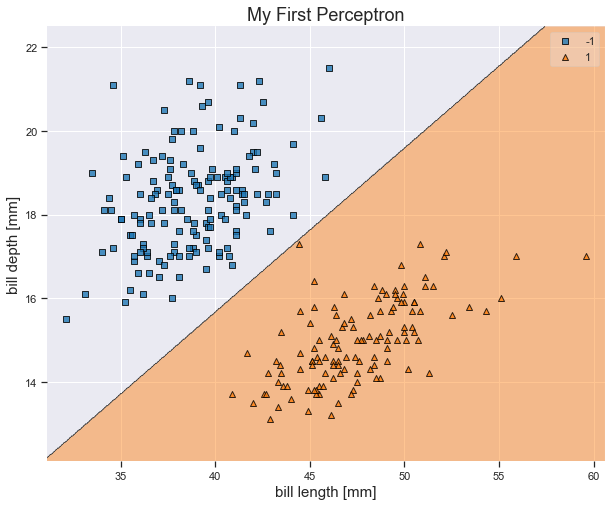

In [19]:
# Create a figure with a size of 10 by 8 inches.
plt.figure(figsize=(10, 8))

# Plot decision regions using the trained perceptron_instance.
plot_decision_regions(X, y, clf=perceptron_instance)

# Set the title of the plot to "My First Perceptron" with a font size of 18.
plt.title("My First Perceptron", fontsize=18)

# Set the x-axis label to "bill length [mm]" with a font size of 15.
plt.xlabel("bill length [mm]", fontsize=15)

# Set the y-axis label to "bill depth [mm]" with a font size of 15.
plt.ylabel("bill depth [mm]", fontsize=15)

# Display the plot.
plt.show()


---

Now, we generate a plot to visualize the progression of misclassifications (errors) over the iterations during the training of our perceptron model. The x-axis represents the number of iterations, while the y-axis shows the corresponding number of misclassifications at each iteration.

This plot serves as a valuable diagnostic tool for understanding the learning process of our perceptron. Monitoring the error plot allows us to observe how well the model is adapting to the training data over time. 

---

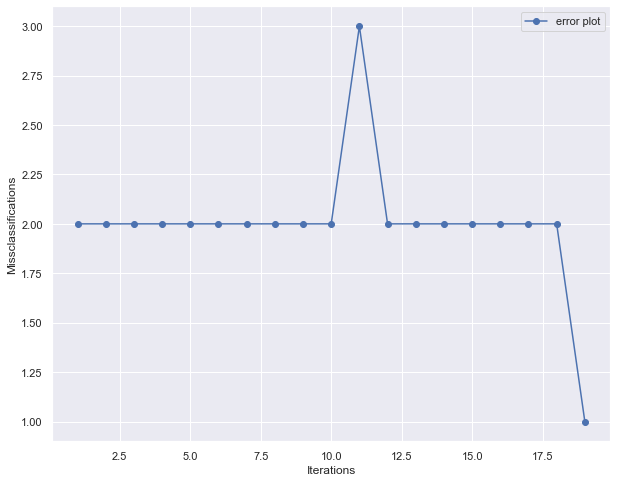

In [20]:
# Create a figure with a size of 10 by 8 inches.
plt.figure(figsize=(10, 8))

# Plot the errors over iterations using a marker style "o" and label "error plot".
plt.plot(range(1, len(perceptron_instance.errors_) + 1), perceptron_instance.errors_, 
         marker="o",
         label="error plot")

# Set the x-axis label to "Iterations".
plt.xlabel("Iterations")

# Set the y-axis label to "Missclassifications".
plt.ylabel("Missclassifications")

# Display the legend.
plt.legend()

# Display the plot.
plt.show()


test2
